In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier


In [2]:
df=pd.read_excel("C:\\glass.xlsx",header=0,sheet_name=1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df[df.duplicated(keep=False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(213, 10)

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


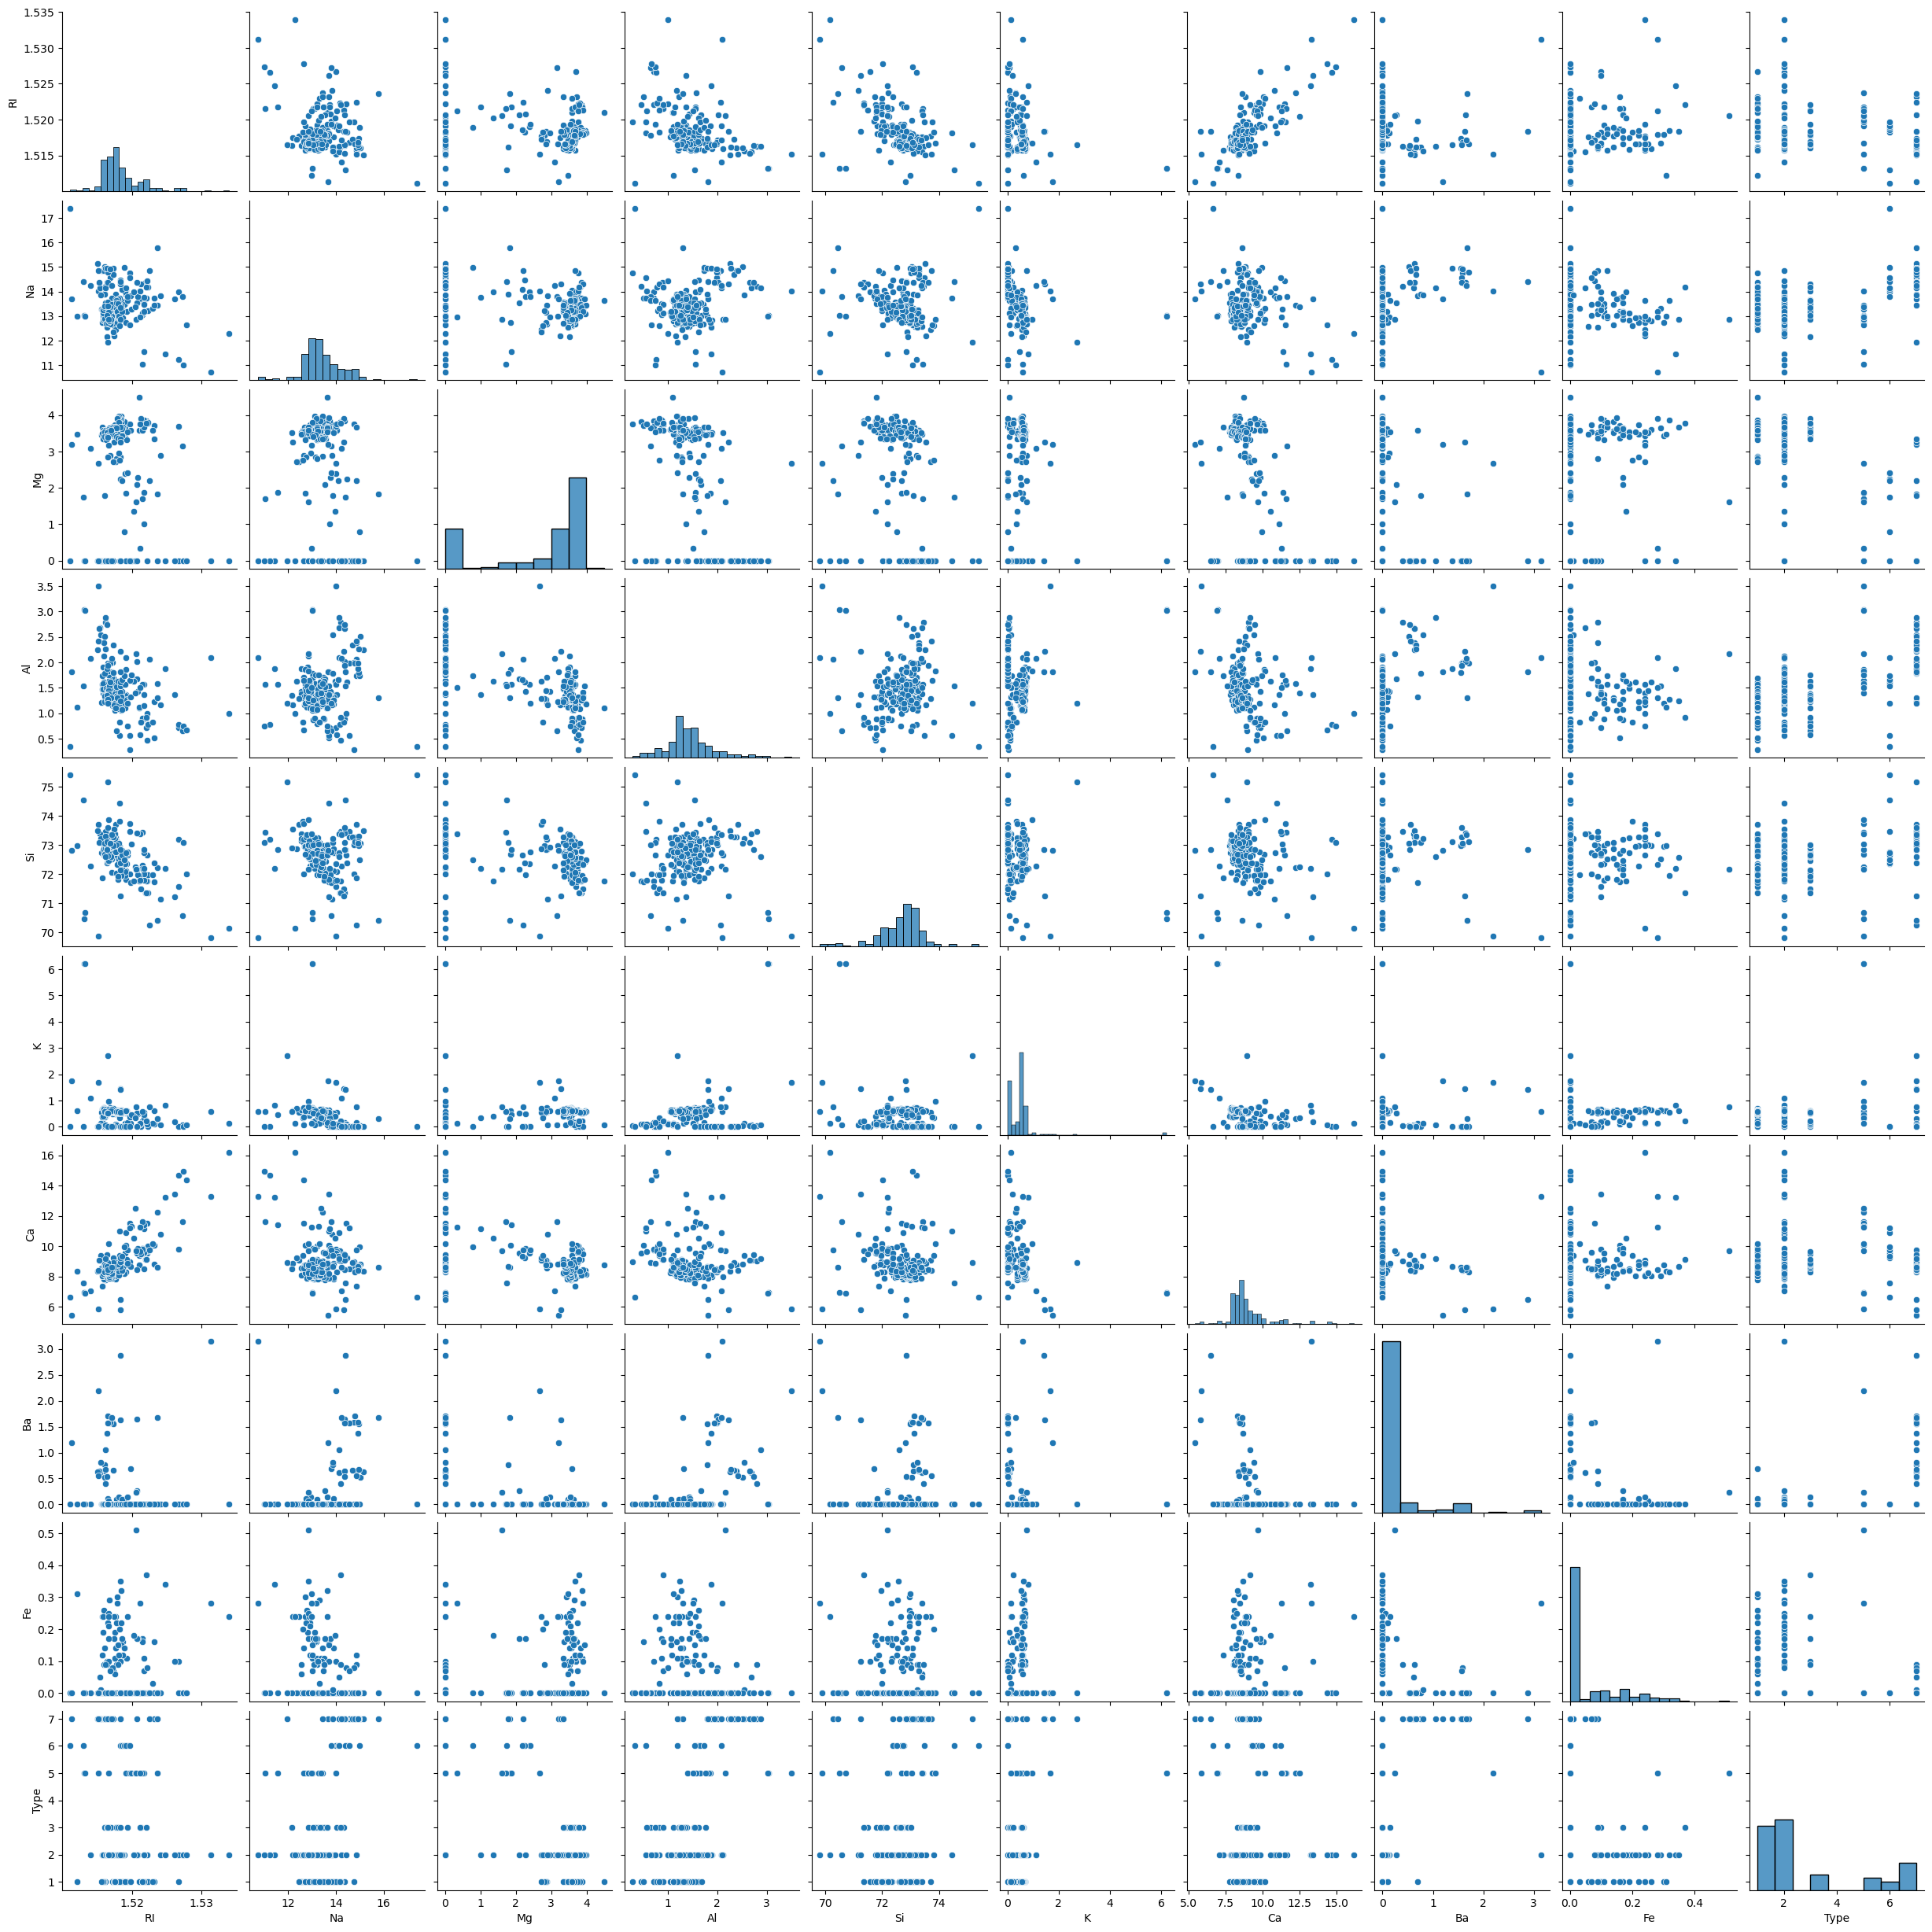

In [9]:
# Visualize the distribution of features
sns.pairplot(df)

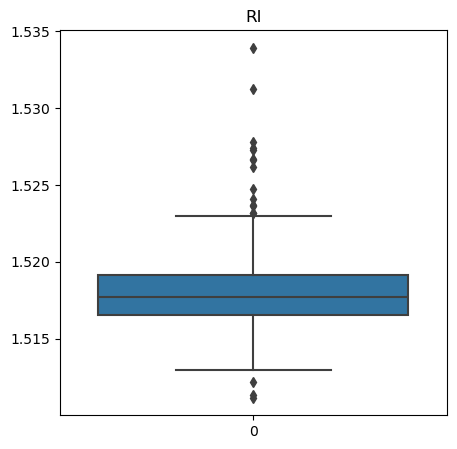

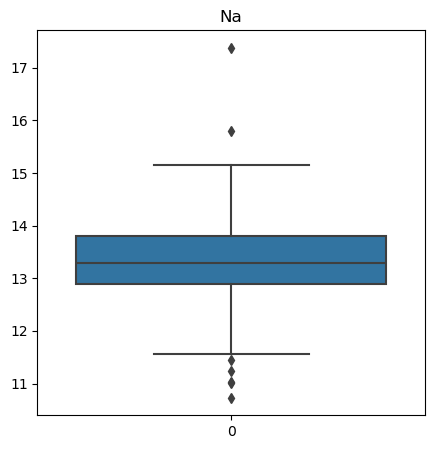

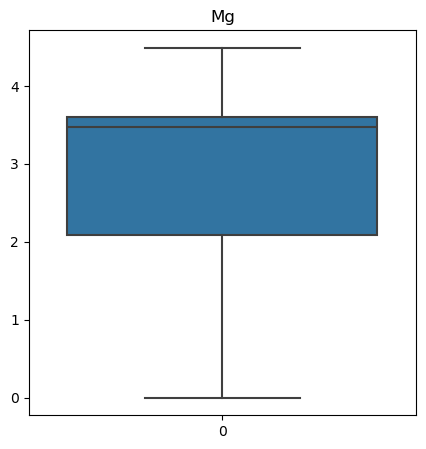

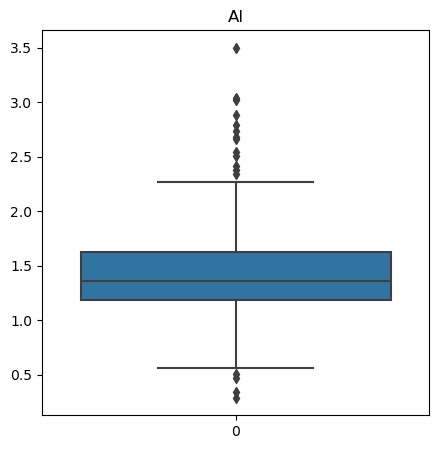

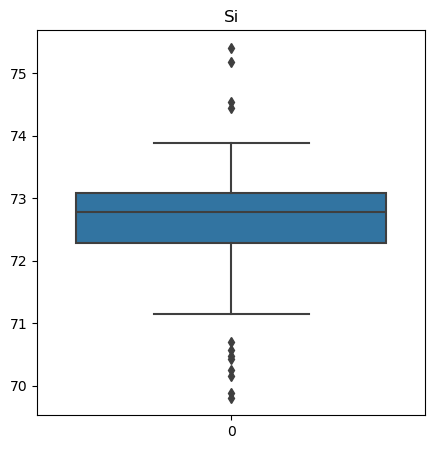

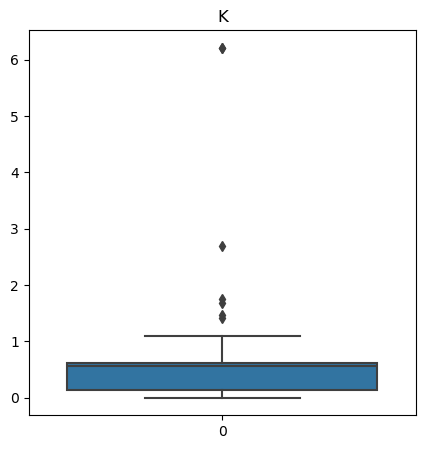

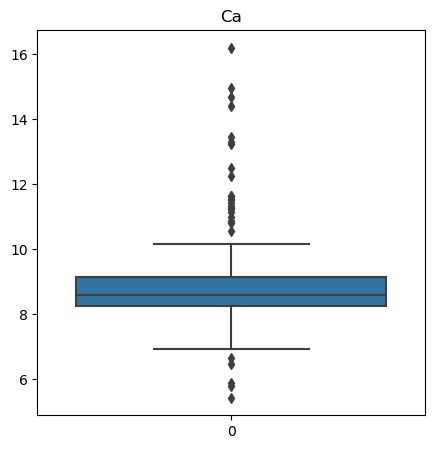

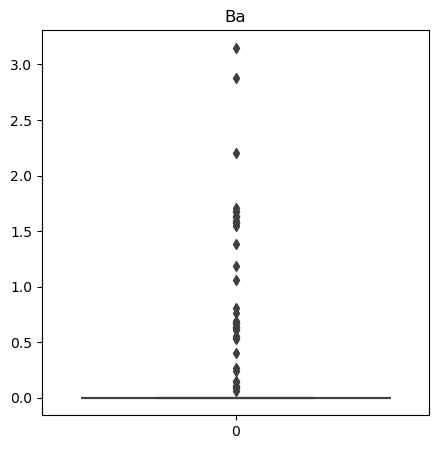

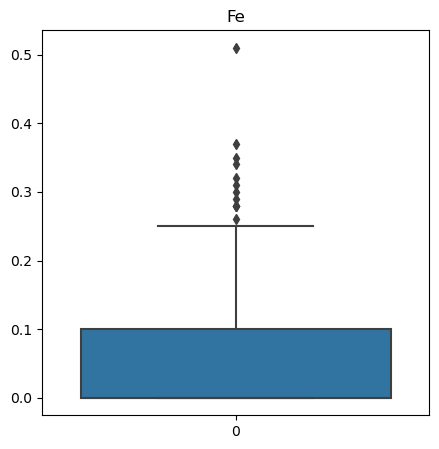

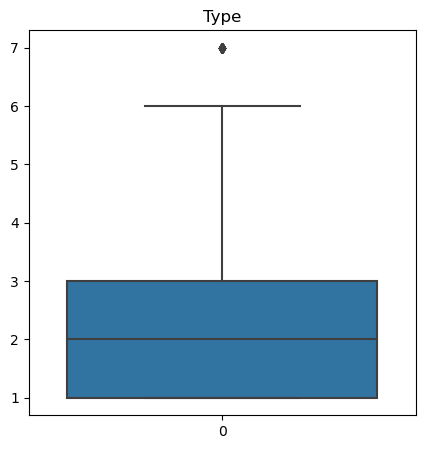

In [10]:
for column in df.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

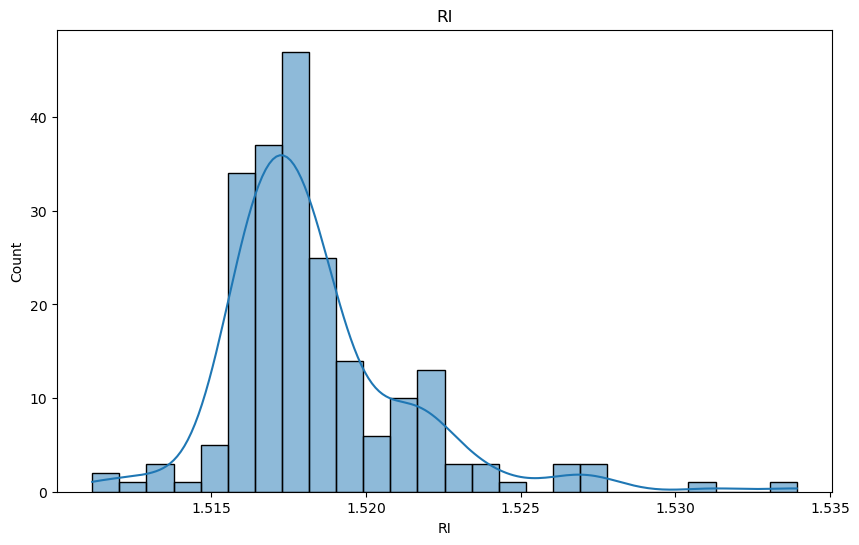

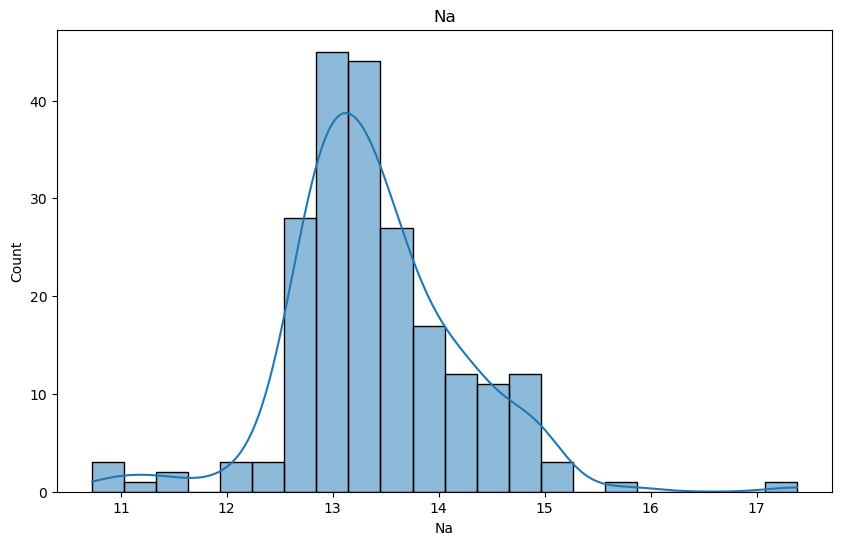

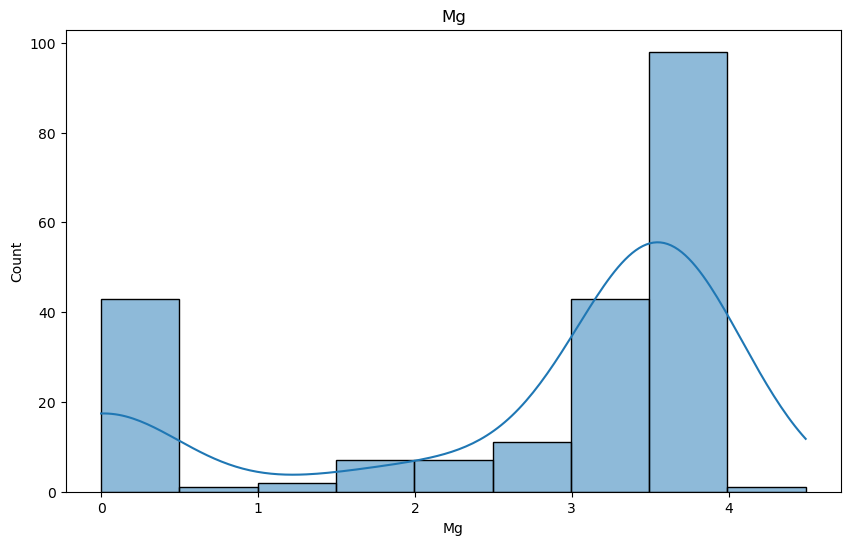

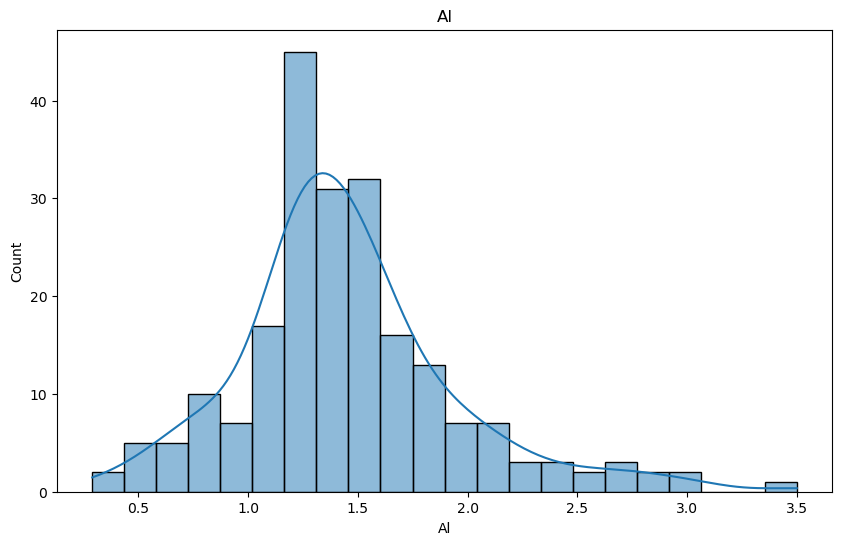

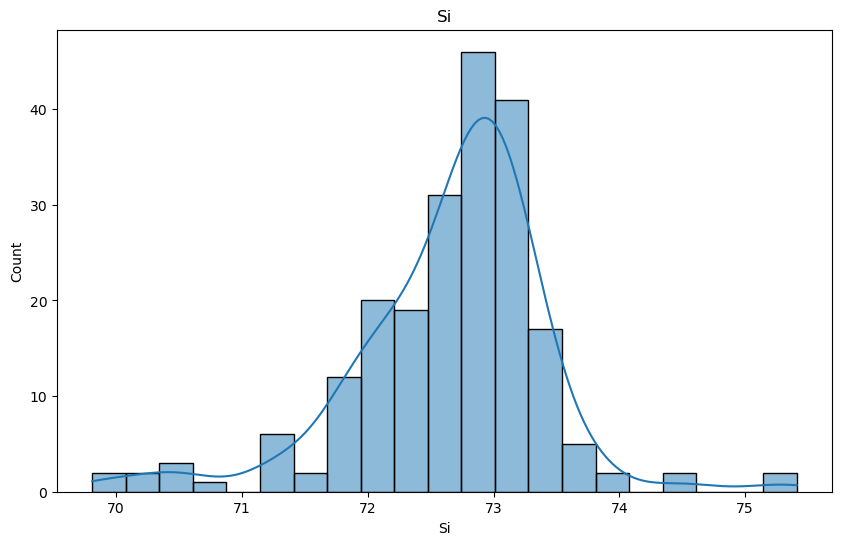

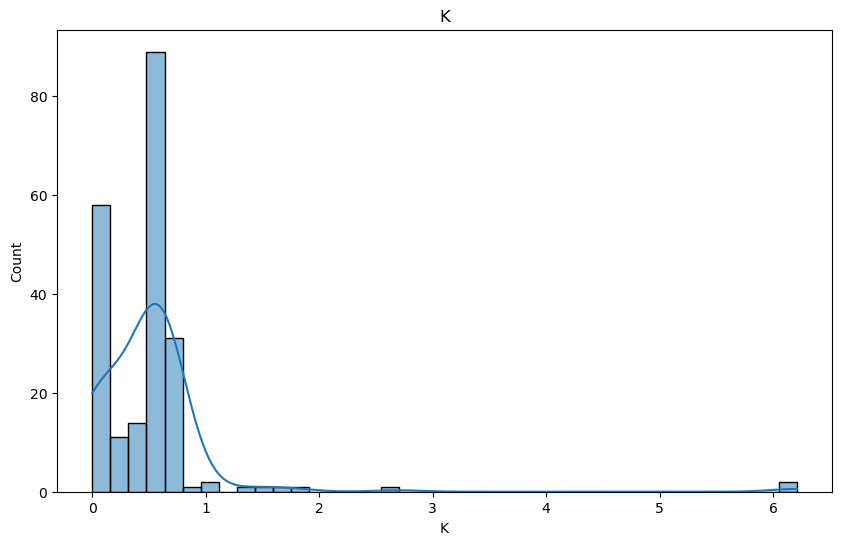

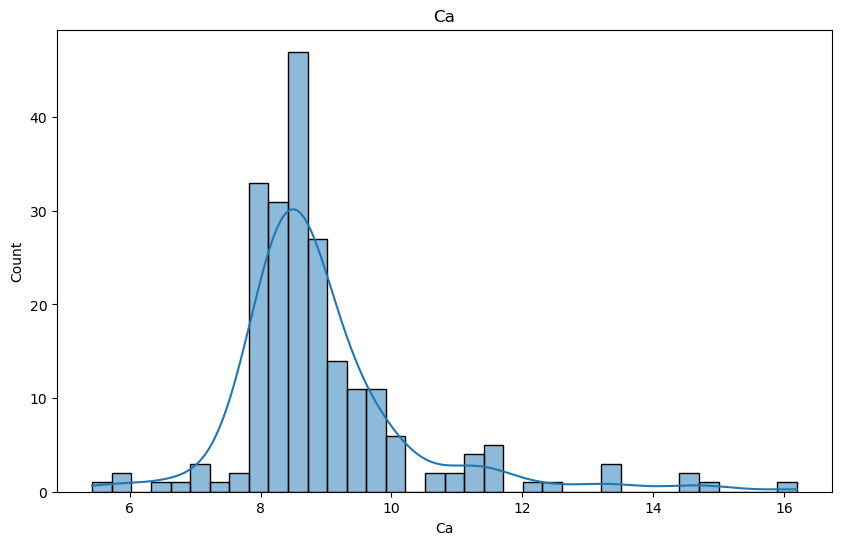

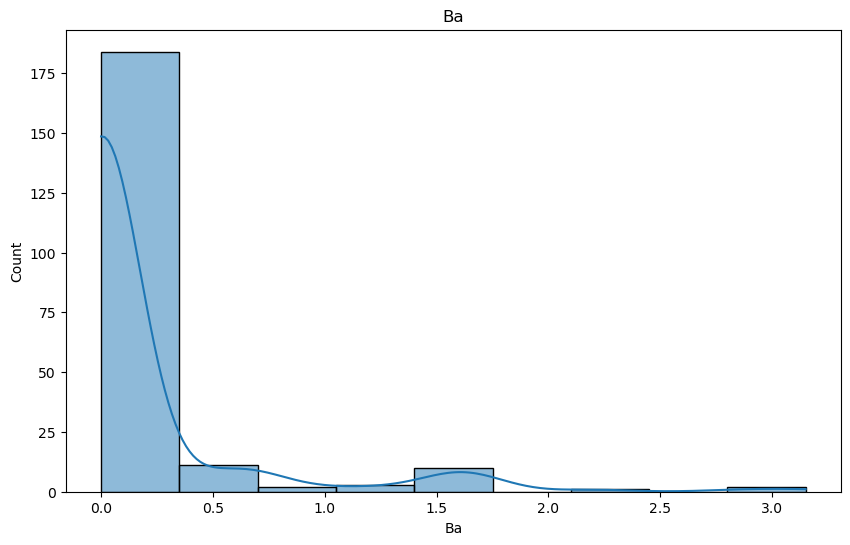

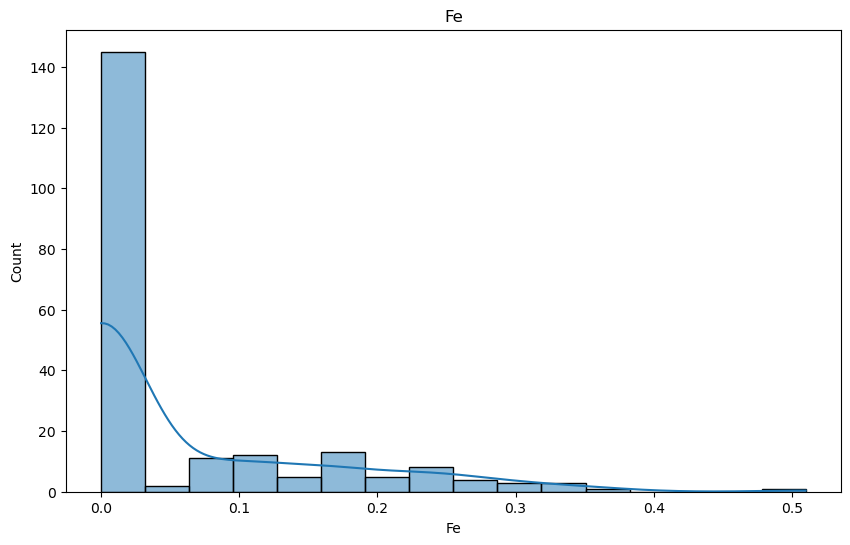

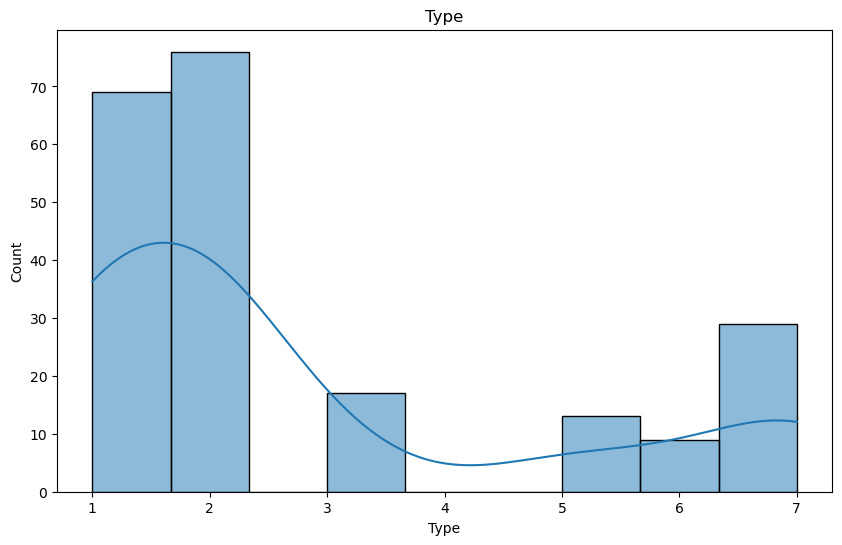

In [11]:
# Visualize the distribution of individual features
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.show()
    

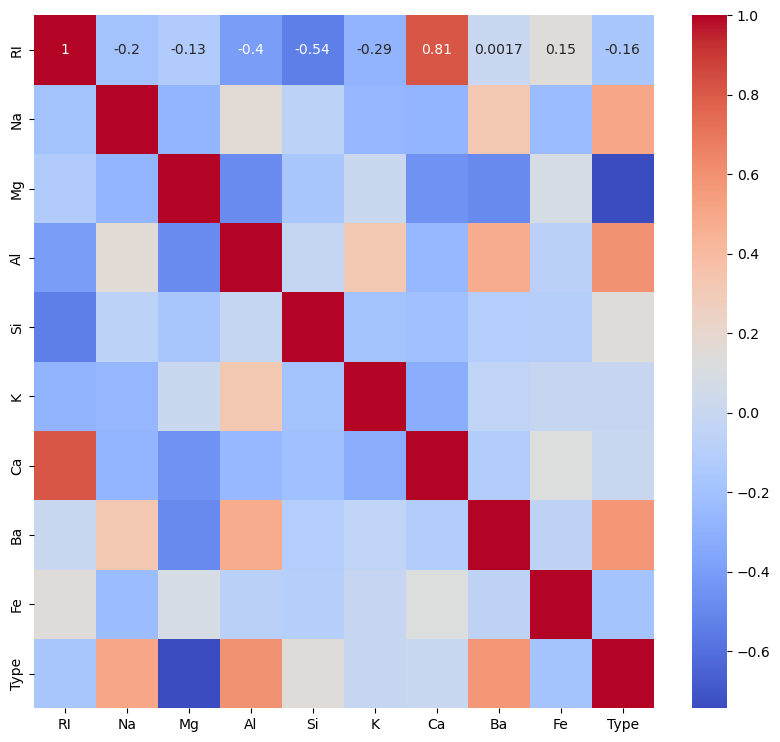

In [12]:
# Check for correlations between features
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
# Scale features using StandardScaler
scaler = StandardScaler()
df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']] = scaler.fit_transform(df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']])

In [14]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,1
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,1
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,1
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,1
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301,7
210,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301,7
211,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301,7
212,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301,7


In [15]:
# Handle imbalance data using oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(df.drop('Type', axis=1), df['Type'])


In [16]:
x=X_res


In [17]:
y=y_res

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [19]:
model=RandomForestClassifier(n_estimators=100,random_state=40)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=40)

In [20]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))



Accuracy: 0.9130434782608695
Precision: 0.9171325750273119
Recall: 0.9095238095238095


In [21]:
#Bagging
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))

Bagging Accuracy: 0.9021739130434783


C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [22]:
# Boosting
boosting = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
boosting.fit(x_train, y_train)
y_pred_boosting = boosting.predict(x_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))


Bagging Accuracy: 0.9021739130434783


C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [23]:
'''1. Explain Bagging and Boosting methods. How is it different from each other.

A. Bagging (Bootstrap Aggregating)

Bagging is an ensemble learning method that:

1. Creates multiple subsets of the training data (with replacement)
2. Trains a model on each subset
3. Combines the predictions of all models

Boosting

Boosting is an ensemble learning method that:

1. Trains a model on the entire training data
2. Calculates the errors of the model
3. Trains another model on the errors
4. Combines the predictions of both models

Bagging is a parallel approach that reduces overfitting by averaging multiple models,
while Boosting is a sequential approach that improves performance by focusing on errors and weighting predictions.
'''

'1. Explain Bagging and Boosting methods. How is it different from each other.\n\nA. Bagging (Bootstrap Aggregating)\n\nBagging is an ensemble learning method that:\n\n1. Creates multiple subsets of the training data (with replacement)\n2. Trains a model on each subset\n3. Combines the predictions of all models\n\nBoosting\n\nBoosting is an ensemble learning method that:\n\n1. Trains a model on the entire training data\n2. Calculates the errors of the model\n3. Trains another model on the errors\n4. Combines the predictions of both models\n\nBagging is a parallel approach that reduces overfitting by averaging multiple models,\nwhile Boosting is a sequential approach that improves performance by focusing on errors and weighting predictions.\n'

In [ ]:
'''2. Explain how to handle imbalance in the data.
 A. SMOTE (Synthetic Minority Over-sampling Technique): Create synthetic instances of the minority class using interpolation.
